In [ ]:
# import numpy as np
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# from ipywidgets import interact, FloatSlider

# # Parameters
# Np = 1024
# omega = np.linspace(-10, 10, Np, endpoint=False)
# deltat = 2 * np.pi / 20
# tlimit = deltat * Np / 2
# time = np.linspace(-tlimit, tlimit, Np, endpoint=False)

# # Function to generate plots
# def plot_func(owidth, twidth, omega0, xlim, xlim2, random):
#     global ftime, fomega, fphase

#     # Random Phases and Fourier Transforms
#     if random == 1 or ('fphase' not in globals()):
#         fphase = (np.random.rand(Np) * 2 - 1) * np.pi
#     fomega = 1.5 * np.exp(-(omega - omega0) ** 2 / owidth ** 2 + fphase * 1j)
#     ftime = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fomega)))
#     tFilter = np.exp(-time ** 2 / twidth ** 2)
#     ftime2 = ftime * tFilter
#     fomega2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ftime2)))

#     # Create subplots
#     fig = make_subplots(rows=2, cols=2,
#                         subplot_titles=('Spectrum Initial', 'Spectrum Final', 'Temporal Field Initial', 'Temporal Field Final'))

#     # Spectrum Initial
#     fig.add_trace(go.Scatter(x=omega, y=fphase, mode='lines', name='Random Phase', opacity=0.3), row=1, col=1)
#     fig.add_trace(go.Scatter(x=omega, y=np.abs(fomega)**2, mode='lines', name='Spectrum Initial', line=dict(width=2)), row=1, col=1)

#     # Temporal Field Initial
#     fig.add_trace(go.Scatter(x=time, y=np.real(ftime), mode='lines', name='Temporal Field Initial'), row=2, col=1)

#     # Spectrum Final
#     fig.add_trace(go.Scatter(x=omega, y=np.abs(fomega2)**2, mode='lines', name='Spectrum Final'), row=1, col=2)

#     # Temporal Field Final
#     fig.add_trace(go.Scatter(x=time, y=np.real(ftime2), mode='lines', name='Temporal Field Final'), row=2, col=2)
#     fig.add_trace(go.Scatter(x=time, y=tFilter * max(abs(ftime2)), mode='lines', name='Time Filter', line=dict(dash='dash')), row=2, col=2)

#     # Update axes limits and titles
#     fig.update_xaxes(title_text='Frequency (ω)', range=[-0.5, xlim2], row=1, col=1)
#     fig.update_yaxes(title_text='Amplitude', range=[-3.2, 3.2], row=1, col=1)

#     fig.update_xaxes(title_text='Frequency (ω)', range=[-0.5, xlim2], row=1, col=2)
#     fig.update_xaxes(title_text='Time', range=[-xlim, xlim], row=2, col=1)
#     fig.update_xaxes(title_text='Time', range=[-xlim, xlim], row=2, col=2)

#     # Update layout
#     fig.update_layout(height=800, width=1100, title_text='Fourier Transform Analysis', showlegend=True)

#     # Show the figure
#     fig.show()

# # Interactive Widgets
# interact(plot_func,
#          owidth=FloatSlider(value=.5, min=.1, max=1, step=0.01, description='Omega Width'),
#          omega0=FloatSlider(value=1.5, min=0.01, max=4.0, step=0.01, description='Omega 0'),
#          twidth=FloatSlider(value=50, min=.1, max=1000, step=0.01, description='Time Width'),
#          xlim=FloatSlider(value=200, min=1, max=300, step=0.01, description='X Lim'),
#          xlim2=FloatSlider(value=4, min=1, max=10, step=0.01, description='X Lim 2'),
#          random=FloatSlider(value=1, min=0, max=1, step=1, description='Random Phases')
#         )

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
Np = 1024
omega = np.linspace(-1, 3, Np, endpoint=False)
time = np.linspace(-2 * np.pi / 20 * Np / 2, 2 * np.pi / 20 * Np / 2, Np, endpoint=False)

# Function to compute a single pulse with random phases
def compute_pulse(owidth, twidth, omega0):
    fphase = (np.random.rand(Np) * 2 - 1) * np.pi
    fomega = 1.5 * np.exp(-(omega - omega0) ** 2 / owidth ** 2 + fphase * 1j)
    ftime = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fomega)))
    tFilter = np.exp(-time ** 2 / twidth ** 2)
    ftime2 = ftime * tFilter
    return ftime2

# Generate 100 pulses
owidth = 0.5
twidth = 50
omega0 = 0.778

pulses = [compute_pulse(owidth, twidth, omega0) for _ in range(100)]

# Create the animation
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], lw=2)
ax.set_xlim(-300, 300)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
ax.set_title("Temporal Pulse Animation")

def update(frame):
    line.set_data(time, np.real(pulses[frame]))
    return line,

ani = FuncAnimation(fig, update, frames=100, blit=True)

# Save the animation as a GIF
ani.save("pulses_animation.gif", writer=PillowWriter(fps=10))

plt.close()

In [28]:
omega0_au

0.7790856301240862

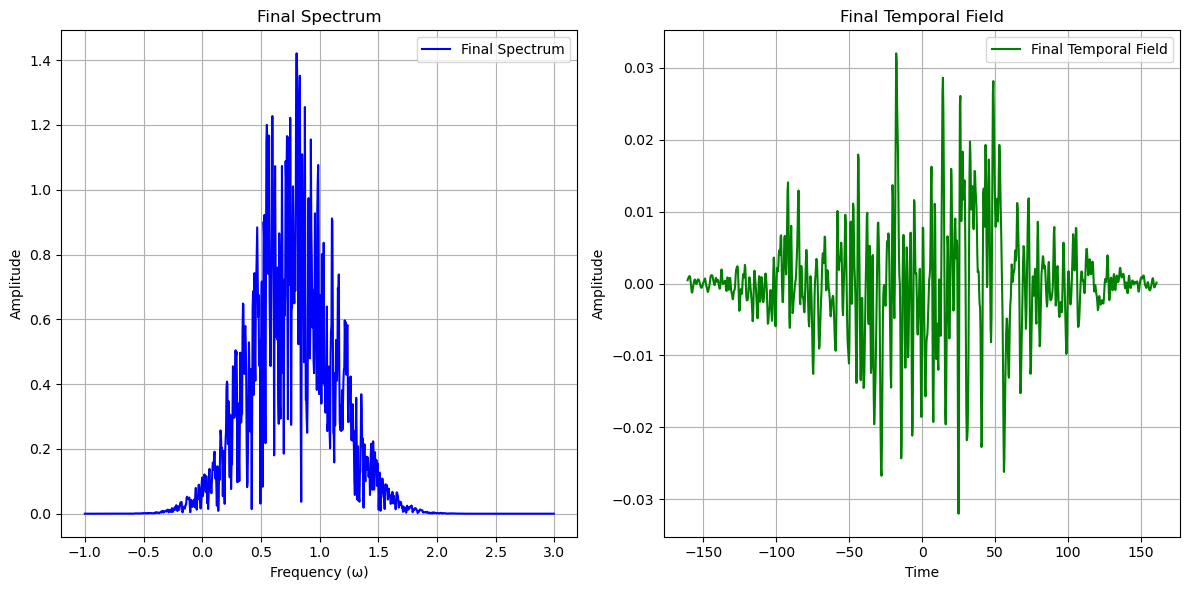

In [33]:
# Function to compute final spectrum and temporal field
def compute_final_spectrum_temporal(owidth, twidth, omega0, random):
    global ftime, fomega, fphase
    Np = 1024
    omega = np.linspace(-1, 3, Np, endpoint=False)
    time = np.linspace(-2 * np.pi / 20 * Np / 2, 2 * np.pi / 20 * Np / 2, Np, endpoint=False)
    

    # Random Phases and Fourier Transforms
    if random == 1 or ('fphase' not in globals()):
        fphase = (np.random.rand(Np) * 2 - 1) * np.pi
    fomega = 1.5 * np.exp(-(omega - omega0) ** 2 / owidth ** 2 + fphase * 1j)
    ftime = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fomega)))
    tFilter = np.exp(-time ** 2 / twidth ** 2)
    ftime2 = ftime * tFilter
    fomega2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ftime2)))

    return fomega2, ftime2, omega, time

# Define the parameters
omega0_eV = 21.2  # omega in eV
twidth_fs = 5  # temporal FWHM in femtoseconds

# Convert temporal FWHM to Gaussian time width (twidth) in atomic units
au_time = 2.4188843265864e-2  # 1 atomic unit of time in femtoseconds
twidth_au = twidth_fs / (2 * np.sqrt(2 * np.log(2))) / au_time

# Convert omega from eV to atomic units
hartree_energy = 27.211386245981  # 1 Hartree in eV
omega0_au = omega0_eV / hartree_energy

# Run the function
fomega2, ftime2, omega, time = compute_final_spectrum_temporal(owidth=0.5, twidth=twidth_au, omega0=omega0_au, random=1)

# Plot the results
plt.figure(figsize=(12, 6))

# Subplot 1: Final Spectrum
plt.subplot(1, 2, 1)
plt.plot(omega, np.abs(fomega2), label="Final Spectrum", color="blue")
plt.xlabel('Frequency (ω)')
plt.ylabel('Amplitude')
plt.title('Final Spectrum')
plt.grid(True)
plt.legend()

# Subplot 2: Final Temporal Field
plt.subplot(1, 2, 2)
plt.plot(time, np.real(ftime2), label="Final Temporal Field", color="green")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Final Temporal Field')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

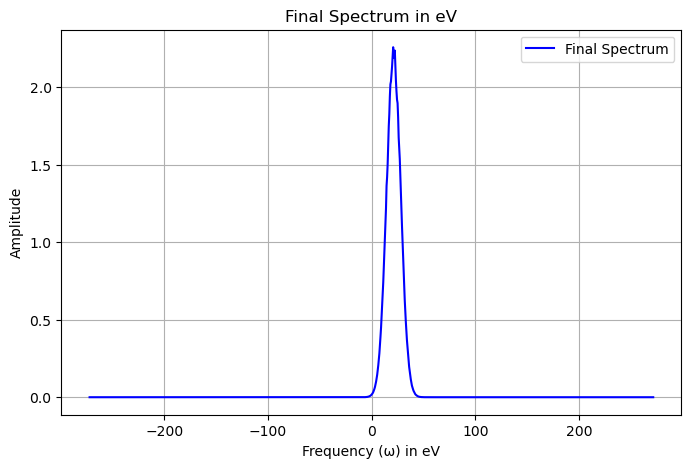

In [10]:
# Convert omega from atomic units to eV
hartree_energy = 27.211386245981  # 1 Hartree = 27.211386245981 eV
omega_eV = omega * hartree_energy

# Plot omega in eV
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(omega_eV, np.abs(fomega2)**2, label="Final Spectrum", color="blue")
plt.xlabel('Frequency (ω) in eV')
plt.ylabel('Amplitude')
plt.title('Final Spectrum in eV')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
import numpy as np

# Parameters
Np = 1024
omega = np.linspace(-10, 10, Np, endpoint=False)
deltat = 2 * np.pi / 20
tlimit = deltat * Np / 2
time = np.linspace(-tlimit, tlimit, Np, endpoint=False)

# Function to compute final spectrum and temporal field
def compute_final_spectrum_temporal(owidth, twidth, omega0, random):
    global ftime, fomega, fphase

    # Random Phases and Fourier Transforms
    if random == 1 or ('fphase' not in globals()):
        fphase = (np.random.rand(Np) * 2 - 1) * np.pi
    fomega = 1.5 * np.exp(-(omega - omega0) ** 2 / owidth ** 2 + fphase * 1j)
    ftime = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fomega)))
    tFilter = np.exp(-time ** 2 / twidth ** 2)
    ftime2 = ftime * tFilter
    fomega2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ftime2)))

    # Return final spectrum and temporal field
    return fomega2, ftime2

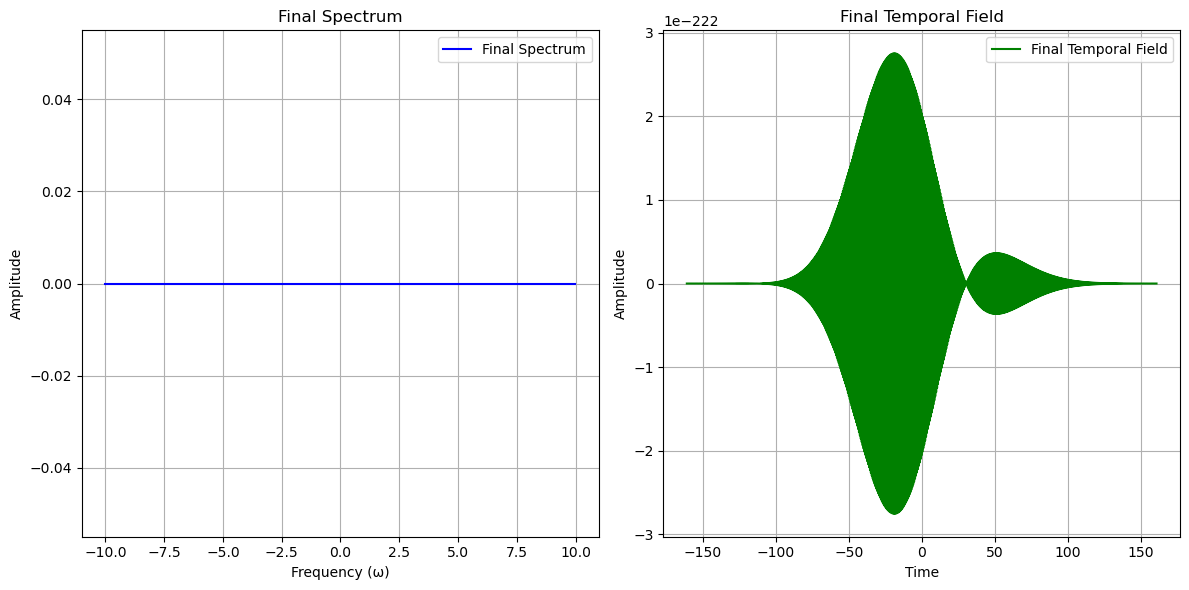

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Call the function to compute fomega2 and ftime2
owidth = 0.5
twidth = 50
omega0 = 21.2
random = 1

fomega2, ftime2 = compute_final_spectrum_temporal(owidth, twidth, omega0, random)

# Plot Final Spectrum
plt.figure(figsize=(12, 6))

# Subplot 1: Final Spectrum
plt.subplot(1, 2, 1)
plt.plot(omega, np.abs(fomega2)**2, label="Final Spectrum", color="blue")
plt.xlabel('Frequency (ω)')
plt.ylabel('Amplitude')
plt.title('Final Spectrum')
plt.grid(True)
plt.legend()

# Subplot 2: Final Temporal Field
plt.subplot(1, 2, 2)
plt.plot(time, np.real(ftime2), label="Final Temporal Field", color="green")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Final Temporal Field')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm, eigh
import os
%matplotlib widget

# Atomic Unit Conversion
au_time = 2.4188843265864e-2 # fs
hartree_energy = 27.211386245981 # eV
au_time_conversion = 1 / au_time # from fs to au_time
au_energy_conversion = 1 / hartree_energy # from eV to au_energy

os.chdir('/asap3/flash/gpfs/fl26/2023/data/11015602/shared/Harijyoti/')
os.getcwd()

def C_t(t, t_min, t_max, delta_T):
    return np.where(
        t < t_min - delta_T, 0,
        np.where(t < t_min, np.sin((t - (t_min - delta_T)) * (np.pi / (2 * delta_T))) ** 2,
        np.where(t <= t_max, 1,
        np.where(t <= t_max + delta_T, np.cos((t - t_max) * (np.pi / (2 * delta_T))) ** 2, 0))))

# Function for E_omega (fundamental frequency)
def E_omega(t, E0, omega, t0, tau, phi_w):
    envelope = np.exp(-((t - t0) / tau) ** 2)
    oscillation_w = np.cos(omega * t + phi_w)
    return (E0 * envelope * oscillation_w )* C_t(t, t_min, t_max, delta_T)

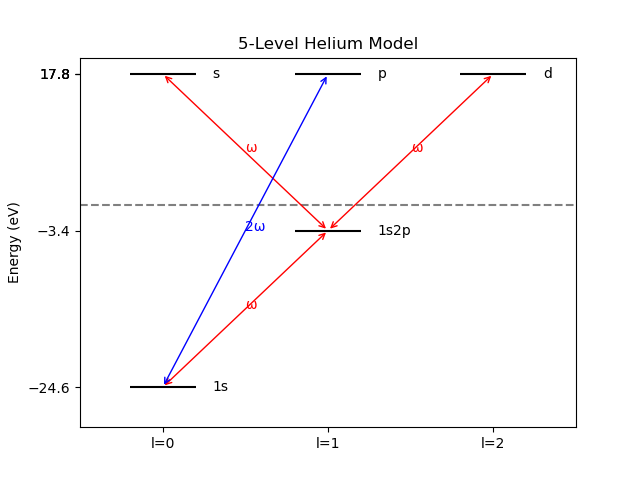

In [2]:
# Define energy levels (in eV)
energy_levels = {
    '1s': -24.6,
    '1s2p': -3.4,
    's': 17.8,
    'p': 17.8,
    'd': 17.8
}



# Energies and dipole elements
omega_s_eV = energy_levels['1s']
omega_p_eV = energy_levels['1s2p']
omega_es_eV = energy_levels['s']
omega_ep_eV = energy_levels['p']
omega_ed_eV = energy_levels['d']

# Convert energies from eV to atomic units
omega_s = omega_s_eV * au_energy_conversion
omega_p = omega_p_eV * au_energy_conversion
omega_es = omega_es_eV * au_energy_conversion
omega_ep = omega_ep_eV * au_energy_conversion
omega_ed = omega_ed_eV * au_energy_conversion
# Print converted energies for verification
# print(f"omega_s: {omega_s} au")
# print(f"omega_p: {omega_p} au")
# print(f"omega_es: {omega_es} au")
# print(f"omega_ep: {omega_ep} au")
# print(f"omega_ed: {omega_ed} au")


# Define x-axis positions for the levels
x_positions = {
    '1s': 0,
    '1s2p': 1,
    's': 0,
    'p': 1,
    'd': 2
}

# Define transitions (start and end points)
transitions = [
    ('1s', '1s2p', '\u03C9', 'red'),
    ('1s2p', 's', '\u03C9', 'red'),
    ('1s2p', 'd', '\u03C9', 'red'),
    ('1s', 'p', '2\u03C9', 'blue')
]

# Create the plot
fig, ax = plt.subplots()

# Plot energy levels
for level, energy in energy_levels.items():
    ax.hlines(energy, xmin=x_positions[level] - 0.2, xmax=x_positions[level] + 0.2, color='black')
    ax.text(x_positions[level] + 0.3, energy, level, verticalalignment='center')

# Plot transitions
for start, end, label, color in transitions:
    ax.annotate('', xy=(x_positions[end], energy_levels[end]), xytext=(x_positions[start], energy_levels[start]),
                arrowprops=dict(arrowstyle='<->', color=color))
    ax.text((x_positions[start] + x_positions[end]) / 2, (energy_levels[start] + energy_levels[end]) / 2, label, color=color)

ax.axhline(y=0, color='gray', linestyle='--', label='Zero Energy')

# Set plot limits and labels
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-30, 20)
ax.set_ylabel('Energy (eV)')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['l=0', 'l=1', 'l=2'])
ax.set_yticks(list(energy_levels.values()))
ax.set_title('5-Level Helium Model')

# Show the plot
plt.show()

Time Step is 10.0 attoseconds


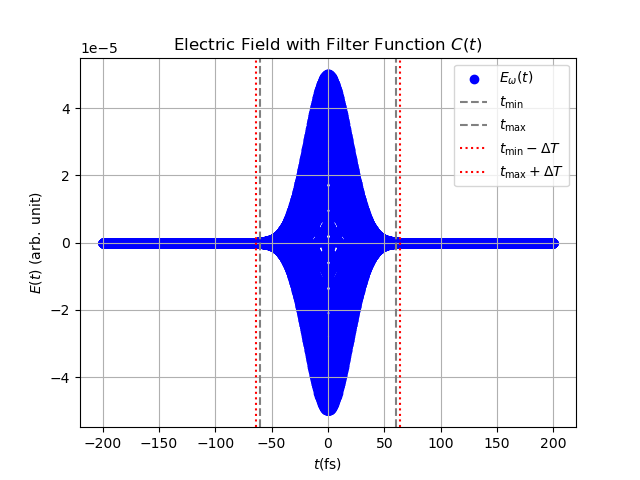

In [18]:
# Time array(in fs)
start_time, stop_time = -200,200  # fs
steps = 40000  # steps
t_values_SI = np.linspace(start_time, stop_time, steps)  # Time array in femtoseconds
dt_SI = t_values_SI[1]- t_values_SI[0]
print(f'Time Step is {np.round(dt_SI*1000, decimals =2)} attoseconds')
t_values = t_values_SI *au_time_conversion  # Time array in atomic units
# Time step
dt = t_values[1] - t_values[0]
# Electric Field parameters
phi_w = 0.0
phi_2w = 0.0
tau = 25  # fs
tau_au = tau * au_time_conversion
t0 = 0 # fs  # setting t0 to a non-zero value to avoid zero limit issue
t0_au = t0 * au_time_conversion
E0_au = 0.00005
E02_au = 0.000005
omega = 21.2*au_energy_conversion

# Markers and annotations
t_min = -(tau-5)*au_time_conversion*3
t_max = (tau-5)*au_time_conversion*3
delta_T = 4*au_time_conversion

E_om = E_omega(t_values, E0_au, omega, t0_au, tau_au, phi_w)

plt.figure()
plt.scatter(t_values_SI, E_om, label='$E_{\omega}(t)$', color='b')
plt.axvline(t_min*au_time, linestyle='--', color='gray', label='$t_{\min}$')
plt.axvline(t_max*au_time, linestyle='--', color='gray', label='$t_{\max}$')
plt.axvline((t_min - delta_T)*au_time, linestyle=':', color='red', label='$t_{\min} - \Delta T$')
plt.axvline((t_max + delta_T)*au_time, linestyle=':', color='red', label='$t_{\max} + \Delta T$')
plt.xlabel('$t (\mathrm{fs})$')
plt.ylabel('$E(t) \ (\mathrm{arb.\ unit})$')
plt.title('Electric Field with Filter Function $C(t)$')
plt.legend(loc='best')
plt.grid()
plt.show()

In [19]:
E_field = E_omega(t_values, E0_au, omega, t0_au, tau_au, phi_w)
np.where((t_values_SI >= 0) & (np.abs(E_field) < 1e-20))[0][0]


26400

In [5]:
# Initial Hamiltonian without the field
H0 = np.array([
    [omega_s, 0, 0, 0, 0],
    [0, omega_p, 0, 0, 0],
    [0, 0, omega_es, 0, 0],
    [0, 0, 0, omega_ep, 0],
    [0, 0, 0, 0, omega_ed]
], dtype=complex)


# Define the decay term in atomic units
decay = au_energy_conversion*1j  #1 eV decay
H0[2, 2] -= decay  # omega_es
H0[3, 3] -= decay  # omega_ep
H0[4, 4] -= decay  # omega_ed

# Hamiltonian function
# def dipole_matrix(d_ped, d_pes, d_sep, d_sp):
#     return np.array([
#         [0, d_sp, 0, d_sep, 0],
#         [d_sp, 0, d_pes, 0, d_ped],
#         [0, d_pes, 0, 0, 0],
#         [d_sep, 0, 0, 0, 0],
#         [0, d_ped, 0, 0, 0]
#     ], dtype=complex)

def dipole_matrix(d_ped, d_pes, d_sep, d_sp):
    return np.array([
        [0, d_sp, 0, d_sep, 0],
        [d_sp, 0, d_pes, 0, d_ped],
        [0, d_pes, 0, 0, 0],
        [d_sep, 0, 0, 0, 0],
        [0, d_ped, 0, 0, 0]
    ], dtype=complex)




In [6]:

# Define dipole matrix elements
# d_pes, d_sep, d_ped = 0.001, 0.0002, 0.0015
d_sp = 0.42
d_pes, d_sep, d_ped = 0.0015, 0.00015, 0.001

# Calculate dipole matrix element
dme = dipole_matrix(d_ped, d_pes, d_sep, d_sp)
# Diagonalize the dipole matrix
dme_eigenvalues, dme_eigenvectors = eigh(dme)
Diagonal_dme = np.diag(dme_eigenvalues)
# Reconstruct the original dipole matrix using its eigenvalues and eigenvectors
# reconstructed_dme = np.dot(dme_eigenvectors, np.dot(Diagonal_dme, dme_eigenvectors.T.conj()))

# print("Original dipole matrix (dme):")
# print(dme)
# print("\nEigenvalues of the dipole matrix:")
# print(dme_eigenvalues)
# print("\nEigenvectors of the dipole matrix:")
# print(dme_eigenvectors)
# print("\nReconstructed dipole matrix:")
# print(reconstructed_dme)

# # Check if the reconstructed matrix is close to the original matrix
# if np.allclose(dme, reconstructed_dme):
#     print("\nThe reconstructed matrix is close to the original matrix.")
# else:
#     print("\nThere is a discrepancy between the original and reconstructed matrices.")

In [7]:

def tdse_solver(omega_ev):
    omega_au = omega_ev*au_energy_conversion
    #E_om = E_omega(t_values, E0_au, omega_au, t0_au, tau_au, phi_w)
    dfs = {} # DataFrames for the all the populations at each time step
    # Initial state
    psi_0 = np.array([1, 0, 0, 0, 0], dtype=complex)
    #psi_0 = np.array([1, 0], dtype=complex)
    psi_t_list = [psi_0]
    U0_half_dt = expm(-1j * H0 * dt / 2)
    for index in range(len(t_values[1:])):
        t = t_values[index]
        #print(f"Time step {index}: t = {t} au")
        # Calculate the electric field at time t
        EF1 = E_omega(t, E0_au, omega_au, t0_au, tau_au, phi_w)
        EF2 = E_omega(t, E02_au, 2*omega_au, t0_au, tau_au, phi_2w)
        EF =EF1 + EF2
        #print(f"Electric field at t = {t} au: {EF}")
        psi_dt = psi_t_list[index]
        #print(f"psi_dt: {psi_dt}")
        psi_0_u0 = np.matmul(U0_half_dt, psi_dt)
        #print(f"psi_0_u0: {psi_0_u0}")
        psi_0_eigenbasis = np.matmul(dme_eigenvectors.T.conj(), psi_0_u0)
        u_t = expm(-1j *EF* Diagonal_dme * dt )
        #print(f"u_t: {u_t}")
        psi_t_eigenbasis = np.matmul(u_t, psi_0_eigenbasis)
        #print(f"psi_t_eigenbasis: {psi_t_eigenbasis}")
        psi_t_pre = np.matmul(dme_eigenvectors, psi_t_eigenbasis)
        #print(f"psi_t_pre: {psi_t_pre}")
        psi_t_u0 = np.matmul(U0_half_dt, psi_t_pre)
        # # Check for NaN values
        # if np.isnan(psi_t_u0).any():
        #     print(f"NaN detected at time step {index}, EF: {EF}")
        #     print(f"Intermediate values at time step {index}:")
        #     print(f"psi_0_u0: {psi_0_u0}")
        #     print(f"psi_0_eigenbasis: {psi_0_eigenbasis}")
        #     print(f"u_t: {u_t}")
        #     print(f"psi_t_eigenbasis: {psi_t_eigenbasis}")
        #     print(f"psi_t_pre: {psi_t_pre}")
        #     break
        psi_t_list.append(psi_t_u0)
    psi_t_array = np.array(psi_t_list)
    dfs[f'df_psi_{round(omega_ev,4)}'] = pd.DataFrame(psi_t_array, columns=['s', 'p', 'es', 'ep', 'ed'])
    return dfs

In [15]:
omega_ev = 21.2
#print(f"Running simulation for omega = {round(omega_ev, 3)} eV")
dfs = tdse_solver(omega_ev)
print(f"Completed simulation for omega = {round(omega_ev, 3)} eV")

Completed simulation for omega = 21.2 eV


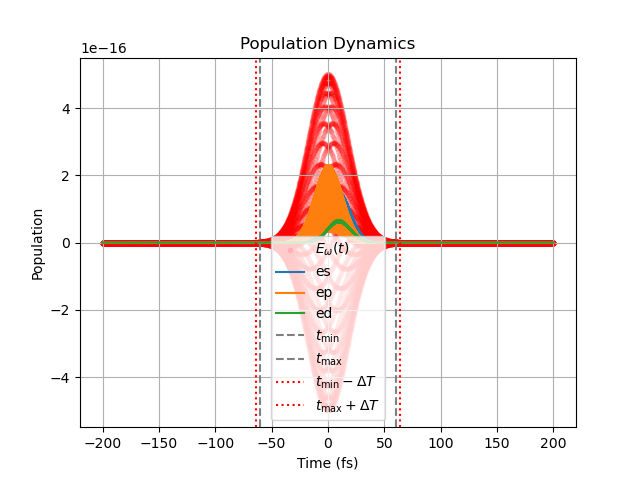

In [16]:
plt.figure()
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['s'])**2, label='s')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['p'])**2, label='p')
E_field = E_omega(t_values, E0_au, omega_ev*au_energy_conversion, t0_au, tau_au, phi_w)
plt.scatter(t_values_SI, E_field/1e11, marker = '.', label='$E_{\omega}(t)$', color='r', alpha=0.1)
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['es'])**2, label='es')
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ep'])**2, label='ep')
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ed'])**2, label='ed')
plt.axvline(t_min*au_time, linestyle='--', color='gray', label='$t_{\min}$')
plt.axvline(t_max*au_time, linestyle='--', color='gray', label='$t_{\max}$')
plt.axvline((t_min - delta_T)*au_time, linestyle=':', color='red', label='$t_{\min} - \Delta T$')
plt.axvline((t_max + delta_T)*au_time, linestyle=':', color='red', label='$t_{\max} + \Delta T$')
plt.xlabel('Time (fs)')
plt.ylabel('Population')
plt.title('Population Dynamics')
plt.legend(loc='best')
plt.grid()
plt.show()

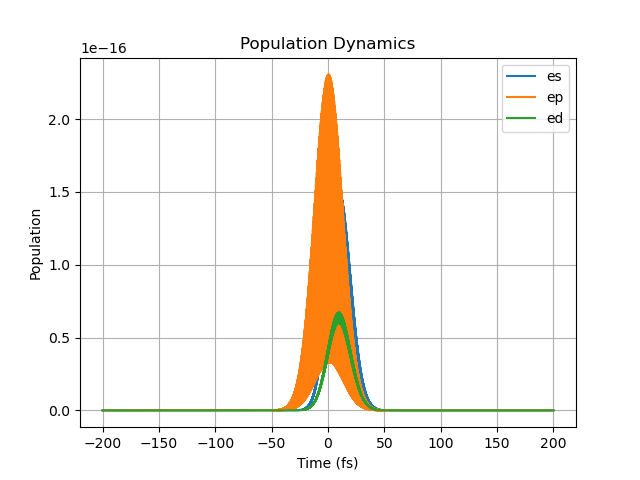

In [17]:
plt.figure()
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['s'])**2, label='s')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['p'])**2, label='p')
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['es'])**2, label='es')
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ep'])**2, label='ep')
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ed'])**2, label='ed')
plt.xlabel('Time (fs)')
plt.ylabel('Population')
plt.title('Population Dynamics')
# plt.axhline(y=0, color='gray', linestyle='--', label='Zero Population')
# plt.axvline(t_min*au_time, linestyle='--', color='gray', label='$t_{\min}$')
# plt.axvline(t_max*au_time, linestyle='--', color='gray', label='$t_{\max}$')
# plt.axvline((t_min - delta_T)*au_time, linestyle=':', color='red', label='$t_{\min} - \Delta T$')
# plt.axvline((t_max + delta_T)*au_time, linestyle=':', color='red', label='$t_{\max} + \Delta T$')
plt.legend()
plt.grid()
plt.show()

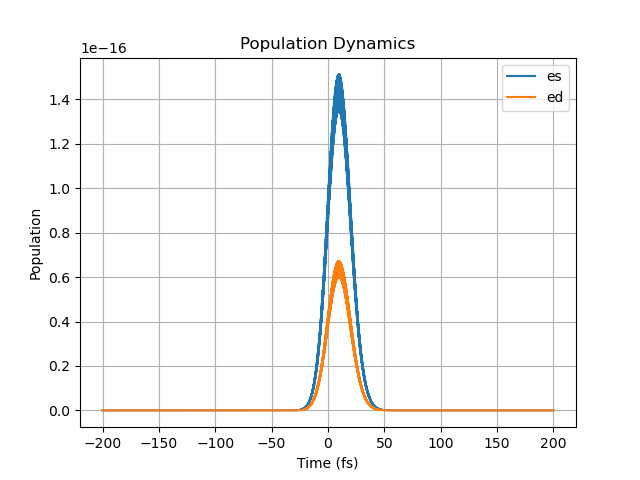

In [18]:
plt.figure()
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['es'])**2, label='es')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ep'])**2, label='ep')
plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ed'])**2, label='ed')
plt.xlabel('Time (fs)')
plt.ylabel('Population')
# plt.axhline(y=0, color='gray', linestyle='--', label='Zero Population')
# plt.axvline(t_min*au_time, linestyle='--', color='gray', label='$t_{\min}$')
# plt.axvline(t_max*au_time, linestyle='--', color='gray', label='$t_{\max}$')
# plt.axvline((t_min - delta_T)*au_time, linestyle=':', color='red', label='$t_{\min} - \Delta T$')
# plt.axvline((t_max + delta_T)*au_time, linestyle=':', color='red', label='$t_{\max} + \Delta T$')
plt.title('Population Dynamics')
plt.legend()
plt.grid()
plt.show()

In [19]:
plt.figure()
plt.close()

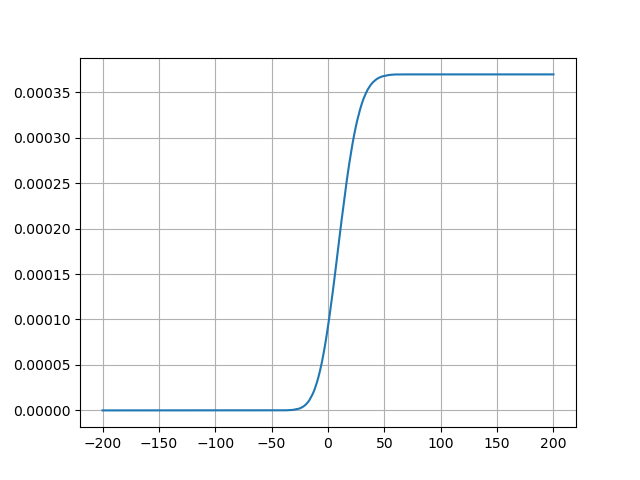

In [20]:

E_field = E_omega(t_values, E0_au, omega_ev*au_energy_conversion, t0_au, tau_au, phi_w)
plt.figure()
#plt.plot(t_values_SI,np.abs(dfs[f'df_psi_{omega_ev}']['s'])**2)
plt.plot(t_values_SI,np.abs(dfs[f'df_psi_{omega_ev}']['p'])**2)
#plt.scatter(t_values_SI, E_field/1e2, label='$E_{\omega}(t)$', color='r')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['es'])**2, label = 'es')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ep'])**2, label = 'ep')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ed'])**2, label = 'ed')
plt.grid(True)
#plt.legend()
plt.show()

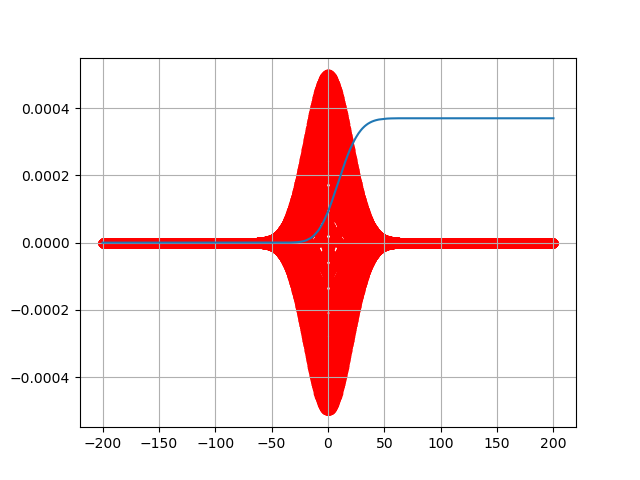

In [21]:
E_field = E_omega(t_values, E0_au, omega_ev*au_energy_conversion, t0_au, tau_au, phi_w)
plt.figure()
#plt.plot(t_values_SI,np.abs(dfs[f'df_psi_{omega_ev}']['s'])**2)
plt.plot(t_values_SI,np.abs(dfs[f'df_psi_{omega_ev}']['p'])**2)
plt.scatter(t_values_SI, E_field*1e1, label='$E_{\omega}(t)$', color='r')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['es'])**2, label = 'es')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ep'])**2, label = 'ep')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ed'])**2, label = 'ed')
plt.grid(True)
#plt.legend()
plt.show()

## Energy Scan

In [8]:
# Running simulations for a range of omega values
steps_eV = 0.001
omega_values = np.round(np.arange(21.1, 21.3, steps_eV), 3)
results_dfs = {}
results_dfp = {}

# Create output directory if it does not exist
output_dir = f'simulation_results_optimisized_{tau}fs_V6.1'
os.makedirs(output_dir, exist_ok=True)

for omega_ev in omega_values:
    print(f"Running simulation for omega = {round(omega_ev, 3)} eV")
    dfs1 = tdse_solver(omega_ev)
    dfs1[f'df_psi_{omega_ev}'].to_csv(os.path.join(output_dir, f'psi_t_stepseV_{steps_eV}_{round(omega_ev, 3)}_d_sep_{d_sep}_d_pes{d_pes}_d_ped_{d_ped}.csv'), index=False)
    #dfp1[f'df_pop_{omega_ev}'].to_csv(os.path.join(output_dir, f'pop_t_stepseV_{steps_eV}_{round(omega_ev, 3)}_d_sep_{d_sep}_d_pes{d_pes}_d_ped_{d_ped}.csv'), index=False)
    results_dfs.update(dfs1)
    #results_dfp.update(dfp1)
    print(f"Completed simulation for omega = {round(omega_ev, 3)} eV")

# Save dictionary objects
results_dfs_path = os.path.join(output_dir, f"results_dfs_stepseV_{steps_eV}_d_sep_{d_sep}_d_pes{d_pes}_d_ped_{d_ped}.pkl")
#results_dfp_path = os.path.join(output_dir, f"results_dfp_stepseV_{steps_eV}_d_sep_{d_sep}_d_pes{d_pes}_d_ped_{d_ped}.pkl")

pd.to_pickle(results_dfs, results_dfs_path)
#pd.to_pickle(results_dfp, results_dfp_path)

print(f"All simulations completed and results saved to {output_dir}")

Running simulation for omega = 21.1 eV
Completed simulation for omega = 21.1 eV
Running simulation for omega = 21.101 eV
Completed simulation for omega = 21.101 eV
Running simulation for omega = 21.102 eV
Completed simulation for omega = 21.102 eV
Running simulation for omega = 21.103 eV
Completed simulation for omega = 21.103 eV
Running simulation for omega = 21.104 eV
Completed simulation for omega = 21.104 eV
Running simulation for omega = 21.105 eV
Completed simulation for omega = 21.105 eV
Running simulation for omega = 21.106 eV
Completed simulation for omega = 21.106 eV
Running simulation for omega = 21.107 eV
Completed simulation for omega = 21.107 eV
Running simulation for omega = 21.108 eV
Completed simulation for omega = 21.108 eV
Running simulation for omega = 21.109 eV
Completed simulation for omega = 21.109 eV
Running simulation for omega = 21.11 eV
Completed simulation for omega = 21.11 eV
Running simulation for omega = 21.111 eV
Completed simulation for omega = 21.111 e

In [9]:
os.getcwd()

'/asap3/flash/gpfs/fl26/2023/data/11015602/shared/Harijyoti'

In [8]:
ls

'c_phi_spd_40_45(1).dat'
'c_phi_spd_40_45 (no phase jumps).dat'
 dipole_moment_dynamics.png
 EFieldTest14032025.ipynb
 FastV4automatedTDSEsolver.ipynb
 gaussian_electric_field.png
 OldStuffs/
 population_dynamics.png
 psi_t_21.2.csv
 psi_t_21.3.csv
 __pycache__/
 sim_200fs/
 simulation_results_optimisized_10fs_V2.1/
 simulation_results_optimisized_20fs_V1/
 simulation_results_optimisized_25fs_V2.1/
 simulation_results_optimisized_25fs_V3.1/
 simulation_results_optimisized_25fs_V3.2/
 simulation_results_optimisized_25fs_V6.1/
 simulation_results_optimisized_40fs_V2.2/
 simulation_results_optimisized_50fs_V1/
 simulation_results_optimisized_50fs_V2/
 simulation_results_optimisized_50fs_V2.1/
 simulation_results_optimisized_50fs_V2.2/
 simulation_results_optimisized_50fs_V3.1/
 simulation_results_optimisized_50fs_V3.2/
 simulation_results_optimisized_50fs_V3.3/
 simulation_results_optimisized_50fs_V4.2/
 simulation_results_optimisized_50fs_V5.1/
 simulation_results_optimisized_50fs_V6.1/


In [13]:
cd simulation_results_optimisized_75fs_V6.1/

/asap3/flash/gpfs/fl26/2023/data/11015602/shared/Harijyoti/simulation_results_optimisized_75fs_V6.1


In [ ]:
os.getcwd()


'/asap3/flash/gpfs/fl26/2023/data/11015602/shared/Harijyoti/simulation_results_optimisized_75fs_V6.1'

In [150]:
populations = []
populationp = []
populationes = []
populationep = []
populationed = []
E_field = E_omega(t_values, E0_au, omega_ev*au_energy_conversion, t0_au, tau_au, phi_w)
iloc_val = np.where((t_values_SI >= 0) & (np.abs(E_field) < 1e-20))[0][0]
for omega_ev in omega_values:
    #print(omega_ev)
    df = results_dfs[f'df_psi_{omega_ev}']
    populations.append(np.abs(df['s'].iloc[iloc_val])**2)
    populationp.append(np.abs(df['p'].iloc[iloc_val])**2)
    populationes.append(np.abs(df['es'].iloc[iloc_val])**2)
    populationep.append(np.abs(df['ep'].iloc[iloc_val])**2)
    populationed.append(np.abs(df['ed'].iloc[iloc_val])**2)  
    

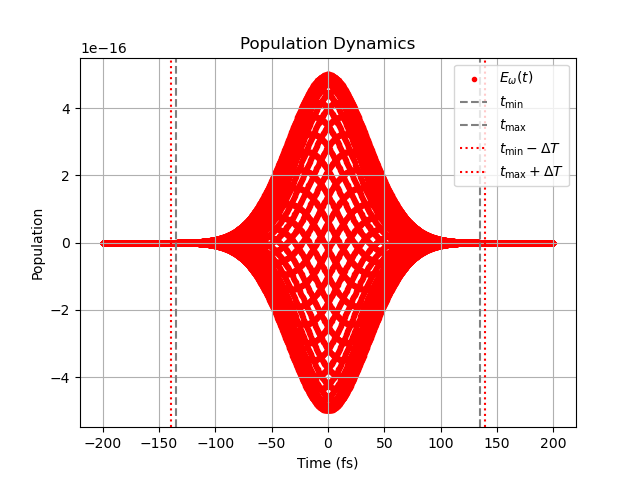

In [113]:
omega_ev = 21.2
plt.figure()
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['s'])**2, label='s')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['p'])**2, label='p')
E_field = E_omega(t_values, E0_au, omega_ev*au_energy_conversion, t0_au, tau_au, phi_w)
plt.scatter(t_values_SI, E_field/1e11, marker = '.', label='$E_{\omega}(t)$', color='r', alpha=1.0)
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['es'])**2, label='es')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ep'])**2, label='ep')
#plt.plot(t_values_SI, np.abs(dfs[f'df_psi_{omega_ev}']['ed'])**2, label='ed')
plt.axvline(t_min*au_time, linestyle='--', color='gray', label='$t_{\min}$')
plt.axvline(t_max*au_time, linestyle='--', color='gray', label='$t_{\max}$')
plt.axvline((t_min - delta_T)*au_time, linestyle=':', color='red', label='$t_{\min} - \Delta T$')
plt.axvline((t_max + delta_T)*au_time, linestyle=':', color='red', label='$t_{\max} + \Delta T$')
plt.xlabel('Time (fs)')
plt.ylabel('Population')
plt.title('Population Dynamics')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
populations = []
populationp = []
populationes = []
populationep = []
populationed = []
iloc_val = np.where((t_values_SI >= 0) & (np.abs(E_field) < 1e-20))[0][0]
for omega_ev in omega_values:
    #print(omega_ev)
    df = results_dfs[f'df_pop_{omega_ev}']
    populations.append(df['s'].iloc[iloc_val])
    populationp.append(df['p'].iloc[iloc_val])
    populationes.append(df['es'].iloc[iloc_val])
    populationep.append(df['ep'].iloc[iloc_val])
    populationed.append(df['ed'].iloc[iloc_val])    
    

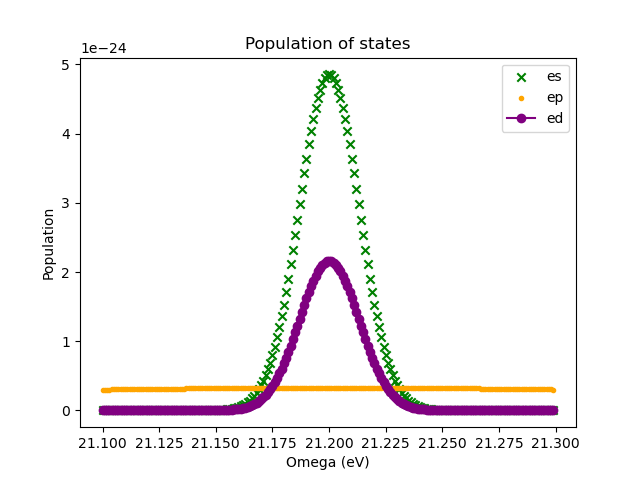

In [153]:
#populations = np.array(populations).astype(int)
plt.figure()
#plt.scatter(omega_values, populations, marker='x', label='s' , color='red')
#plt.scatter(omega_values, populationp, marker='.', label='p', color='blue')
plt.scatter(omega_values, populationes, marker='x', label='es', color='green')
plt.scatter(omega_values, populationep, marker='.', label='ep', color='orange')
plt.plot(omega_values, populationed, label='ed', marker='o', color='purple')
plt.title('Population of states')
plt.xlabel('Omega (eV)')
plt.ylabel('Population')
#plt.legend(['s', 'p', 'es', 'pes', 'ed'])
#plt.legend(['es', 'ep', 'ed'])
plt.legend()
#plt.xlim(21.09, 21.2)
#plt.ylim(0, 3e-17)
plt.show()

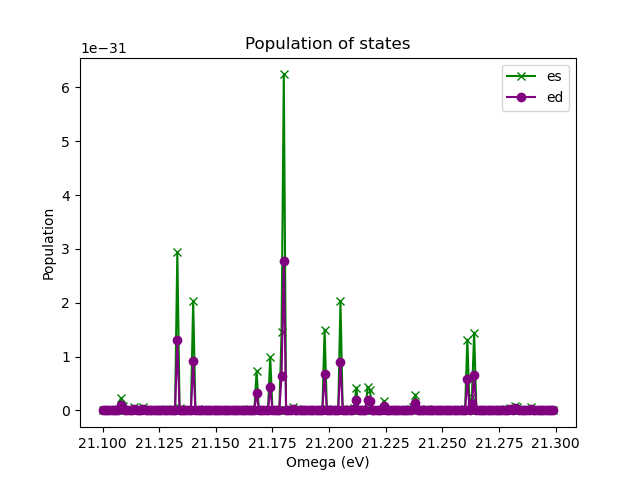

In [ ]:
#populations = np.array(populations).astype(int)
plt.figure()
#plt.scatter(omega_values, populations, marker='x', label='s' , color='red')
#plt.scatter(omega_values, populationp, marker='.', label='p', color='blue')
plt.plot(omega_values, populationes, marker='x', label='es', color='green')
#plt.plot(omega_values, populationep, marker='.', label='ep', color='orange')
plt.plot(omega_values, populationed, label='ed', marker='o', color='purple')
#plt.axvline(x=Ecooper, color='brown', linestyle='--', label='Cooper Minimum')
#plt.axvline(x=Eres, color='black', linestyle='--', label='Resonance')
plt.title('Population of states')
plt.xlabel('Omega (eV)')
plt.ylabel('Population')
plt.legend()
#plt.xlim(21.09, 21.35)
#plt.ylim(0, 3e-17)
plt.show()
#plt.close()

## Compare with Chris Green values

In [ ]:
data=np.loadtxt('c_phi_spd_40_45 (no phase jumps).dat',skiprows=1)
data[1294:2874,2]=-data[1294:2874,2]
data[1294:1564,6]=-data[1294:1564,6]

In [ ]:
Ew= E0_au
E2w= E02_au

DeltaPhi=0

omega=data[:,1]/2
c0=data[:,2]*Ew**2
c1=data[:,4]*E2w
c2=data[:,6]*Ew**2
phi0=data[:,3]
phi1=data[:,5]
phi2=data[:,7]

Wtot=c0**2 + c1**2 + c2**2
beta1=(2*np.sqrt(3)*c0*c1*np.cos(DeltaPhi-(phi0-phi1))
      +(4/np.sqrt(3))*c1*c2*np.cos(DeltaPhi-(phi2-phi1)))/Wtot
beta2=(2*c1**2 + (10/7)*c2**2 + 2*np.sqrt(5)*c0*c2*np.cos(phi2-phi0))/Wtot
beta3=((6/np.sqrt(3))*c1*c2*np.cos(DeltaPhi-(phi2-phi1)))/Wtot
beta4=((18/7)*c2**2)/Wtot

Ecooper=(-c2[1563]/(c2[1564]-c2[1563]))*(omega[1564]-omega[1563])+omega[1563]
Eres=21.216174

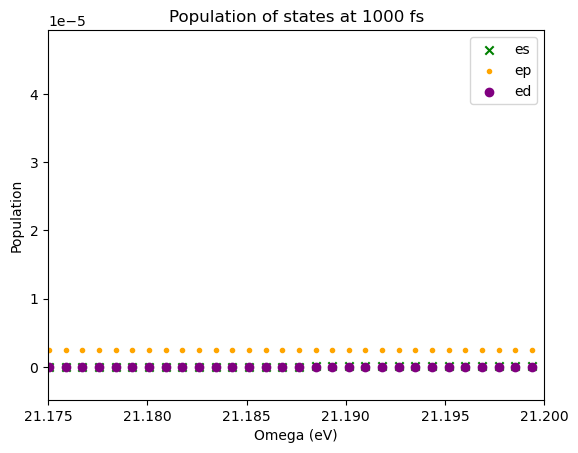

In [ ]:
%matplotlib inline
plt.scatter(omega, c0, marker='x', label='es', color='green')
plt.scatter(omega, c1, marker='.', label='ep', color='orange')
plt.scatter(omega, c2, label='ed', marker='o', color='purple')
plt.title('Population of states at 1000 fs')
plt.xlabel('Omega (eV)')
plt.ylabel('Population')
#plt.legend(['s', 'p', 'es', 'pes', 'ed'])
#plt.legend(['es', 'ep', 'ed'])
plt.legend()
plt.xlim(21.175, 21.2)
plt.show()

In [ ]:
%matplotlib widget

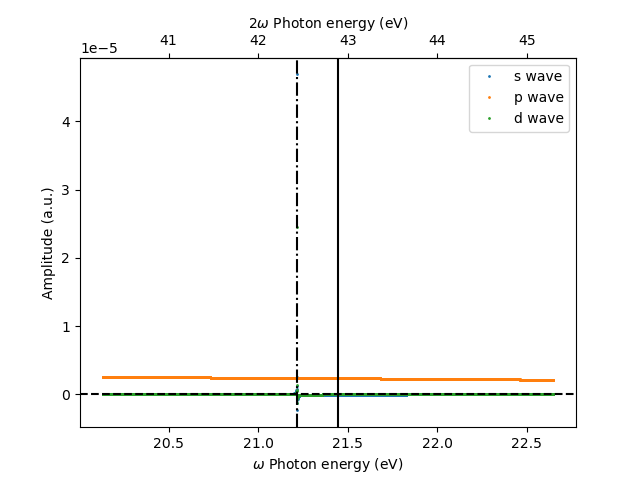

In [ ]:
fig,ax = plt.subplots()
ax.plot(omega,c0,'.',label='s wave',markersize=2)
ax.plot(omega,c1,'.',label='p wave',markersize=2)
ax.plot(omega,c2,'.',label='d wave',markersize=2)
ax.axvline(x=Ecooper,color='black')
ax.axvline(x=Eres,color='black',ls='dashdot')
ax.axhline(y=0,color='black',ls='--')
#plt.yscale('symlog')
ax.set_xlabel(r'$\omega$ Photon energy (eV)')
ax.set_ylabel('Amplitude (a.u.)')
#ax.set_xlim(21.2161,21.2162)
#ax.set_ylim(-0.02,0.02)
plt.legend()
ax2=ax.secondary_xaxis('top',functions=(lambda x:x*2, lambda x:x/2))
ax2.set_xlabel(r'2$\omega$ Photon energy (eV)')
plt.show()
#plt.close()